## TOPIC 1: Gradient Descent for Least Squares Regression

In [5]:
import numpy as np
import sympy as sp
import pylab as pl

%matplotlib inline 

sp.init_printing()
import pandas as pd
# Normalizing the data by dividing by 1000.  Think of this as unit conversion.
data = pd.read_csv('norris.csv')/1000
data.head()

,y,x
0,0.0001,0.0002
1,0.3388,0.3374
2,0.1181,0.1182
3,0.8880,0.8846
4,0.0092,0.0101


### Compute the Exact Solution for Least Squares Regression

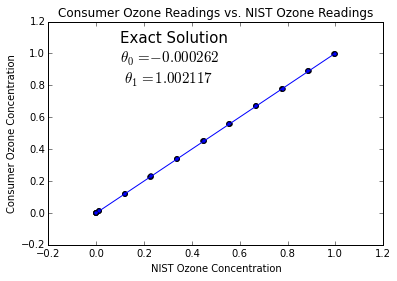

In [2]:
data['ones'] = 1
X = sp.Matrix(data[['ones','x']])
Y = sp.Matrix(data[['y']])
sol = (X.T*X).inv()*X.T*Y

pl.scatter(data.x, data.y)
xplot = np.linspace(0,1,1000)
yplot = sol[0,0] + sol[1,0]*xplot
pl.plot(xplot,yplot)
pl.text(0.1,0.80,"Exact Solution\n$\\theta_0 = %f$\n $\\theta_1 = %f$"% tuple(sol.T), fontsize=15)
pl.title("Consumer Ozone Readings vs. NIST Ozone Readings")
pl.xlabel("NIST Ozone Concentration")
pl.ylabel("Consumer Ozone Concentration")
pl.show()

### Use `sympy` to Construct Formulas for $J\left(\vec{\theta}\right)$ and $\nabla J\left(\vec{\theta}\right)$

We start with `sympy` to obtain exact formula for each function, which will allow us to plot the `contour` of $J\left(\vec{\theta}\right)$

In [7]:
sp.init_printing()

In [9]:
t0, t1 = sp.symbols('t0 t_1')
#In sympy, 1D array is a column vector
T = sp.Matrix([t0, t1])
R = X*T - Y
# Construct J(theta)
Jt = R.T*R
Jtformula = sp.simplify(Jt[0,0])
print ("\n\nThe simplified formula of J(theta)\n\n" )
Jtformula



The simplified formula of J(theta)






The formula of the gradient vector of J(theta)




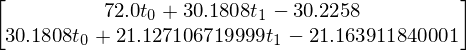

In [10]:
#Compute the gradient vector of J(theta)
dJt = sp.Matrix([sp.diff(Jtformula, t0), sp.diff(Jtformula, t1)])
print ("\n\nThe formula of the gradient vector of J(theta)\n\n" )
dJt

In [11]:
#Construct a function that will work with numpy vectors
dJtnumpy = sp.lambdify((t0, t1), dJt)

### Fifteen Iterations of the Gradient Descent Algorithm

You will need to tinker with $\alpha$ to find a value that

1. isn't too large (i.e. Doesn't jump all over the place and diverge)
2. isn't too small  (i.e. doesn't take very small steps each iteration)

In [13]:
guess = sp.Matrix([-3, -3])
alpha = 0.01
for i in range(15):
    guess = guess - dJtnumpy(*guess)*alpha
    print(guess)

Matrix([[0.367682000000000], [-1.24912368000002]])
Matrix([[0.782204479613446], [-0.884550237717627]])
Matrix([[0.788239592436846], [-0.722106816186184]])
Matrix([[0.740902699861837], [-0.595804435012312]])
Matrix([[0.689529300883510], [-0.481899439824665]])
Matrix([[0.640767310381985], [-0.376554371730871]])
Matrix([[0.595319968730307], [-0.278748909768224]])
Matrix([[0.553076242203814], [-0.187890540843204]])
Matrix([[0.513826216167874], [-0.103478421869516]])
Matrix([[0.477359956074600], [-0.0250541694981562]])
Matrix([[0.443480336488787], [0.0478071164065759]])
Matrix([[0.412003924028425], [0.115500060908607]])
Matrix([[0.382760256345254], [0.178391277875621]])
Matrix([[0.355590956983586], [0.236821373172630]])
Matrix([[0.330348882960919], [0.291106791781389]])


### The Gradient Descent Algorithm with Stopping Condition $\left\| \vec{\theta}_i - \vec{\theta}\_{i-1}\right\| \le 0.001 $

**Warning:** Don't do this step until you have found a good value for $\alpha$, otherwise you may have an **infinite loop**!

In [14]:
alpha = 0.01
#Set up the initial guess (somewhat arbitrarily)
guess = sp.Matrix([-3, -3])
#set diff to a large inital number
diff = 10000.0
while diff > 0.001:
    lastguess = guess.copy()
    #This is the main update step for gradient descent
    #*guess "unpacks" the elements of the guess vector to be used as function arguments
    guess = guess - dJtnumpy(*guess)*alpha
    #Compute the distance between the last two guesses
    diff = (lastguess - guess).norm()
    print("t0 = ", guess[0,0], ", t1 = ", guess[1,0])

t0 =  0.367682000000000 , t1 =  -1.24912368000002
t0 =  0.782204479613446 , t1 =  -0.884550237717627
t0 =  0.788239592436846 , t1 =  -0.722106816186184
t0 =  0.740902699861837 , t1 =  -0.595804435012312
t0 =  0.689529300883510 , t1 =  -0.481899439824665
t0 =  0.640767310381985 , t1 =  -0.376554371730871
t0 =  0.595319968730307 , t1 =  -0.278748909768224
t0 =  0.553076242203814 , t1 =  -0.187890540843204
t0 =  0.513826216167874 , t1 =  -0.103478421869516
t0 =  0.477359956074600 , t1 =  -0.0250541694981562
t0 =  0.443480336488787 , t1 =  0.0478071164065759
t0 =  0.412003924028425 , t1 =  0.115500060908607
t0 =  0.382760256345254 , t1 =  0.178391277875621
t0 =  0.355590956983586 , t1 =  0.236821373172630
t0 =  0.330348882960919 , t1 =  0.291106791781389
t0 =  0.306897328615100 , t1 =  0.341541531943911
t0 =  0.285109285339300 , t1 =  0.388398737442345
t0 =  0.264866753745005 , t1 =  0.431932176894099
t0 =  0.246060104604547 , t1 =  0.472377618109405
t0 =  0.228587485122910 , t1 =  0.50995

### Making plots of $J(\vec{\theta})$ for two difference start guesses

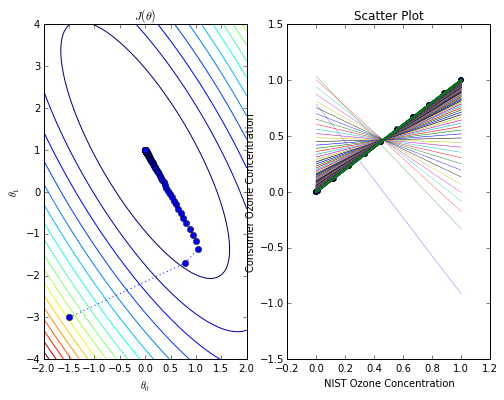

In [15]:
#Make a 2D grid of points
u = np.linspace(-2,2,100)
v = np.linspace(-4,4,100)
U, V = np.meshgrid(u, v)
#Make the Jtheta formula into a numpy ready function
Jnumpy = sp.lambdify((t0, t1), Jtformula)
Z = Jnumpy(U, V)
#
## set up the figure, axes, and empty plots
#
fig = pl.figure(figsize=(8,6))
ax1 = pl.subplot(1,2,1)
ax2 = pl.subplot(1,2,2)
lplot, = ax1.plot([], [], 'bo:')
# A container for the gradient descent approximations initialized to the starting values
def init():
    #
    ## Left hand plot shows the J(theta) contour plot
    #
    ax1.contour(U,V,Z, 20)
    ax1.set_title("$J(\\theta)$")
    ax1.set_xlabel("$\\theta_0$")
    ax1.set_ylabel("$\\theta_1$")
    #
    ## Right hand function shows the scatter plot of the data
    #
    ax2.scatter(data.x, data.y)
    ax2.set_title("Scatter Plot")
    ax2.set_xlabel("NIST Ozone Concentration")
    ax2.set_ylabel("Consumer Ozone Concentration")
guess = sp.Matrix([-1.5, -3])
tlist = guess.copy().T
xplot = np.linspace(0,1,1000)
def animate(i):
    global guess, tlist
    lineweight = 0.25 + 2*i/100.0
    #The next line is the gradient descent update!
    guess = guess - dJtnumpy(*guess)*0.01
    tlist = np.vstack((tlist, guess.T))
    yplot = guess[0,0] + guess[1,0]*xplot
    ax2.plot(xplot,yplot, lw=lineweight)
    lplot.set_data(tlist[:,0],tlist[:,1])
    
init()
for i in range(100):
    animate(i)

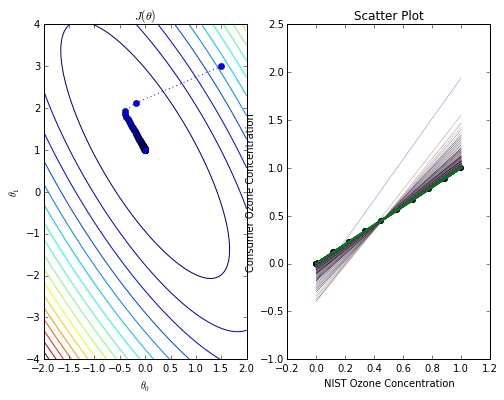

In [16]:
fig = pl.figure(figsize=(8,6))
ax1 = pl.subplot(1,2,1)
ax2 = pl.subplot(1,2,2)
lplot, = ax1.plot([], [], 'bo:')
guess = sp.Matrix([1.5, 3])
tlist = guess.copy().T
init()
for i in range(100):
    animate(i)

### Plotting Only the Successive Models
Next, we will edit the code to only plot the successive models.  When a model has more that two $\theta$'s, we cannot plot $J(\vec{\theta})$

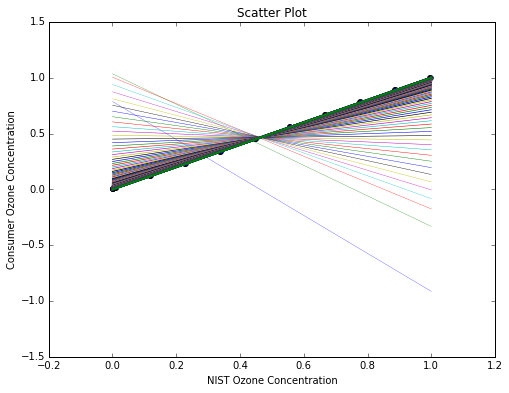

In [17]:
#
## set up the figure, axes, and empty plots
#
fig = pl.figure(figsize=(8,6))
#Now we only need one axis
ax2 = pl.subplot(1,1,1)
# A container for the gradient descent approximations initialized to the starting values
def init_one_plot():
    #
    ## Right hand function shows the scatter plot of the data
    #
    ax2.scatter(data.x, data.y)
    ax2.set_title("Scatter Plot")
    ax2.set_xlabel("NIST Ozone Concentration")
    ax2.set_ylabel("Consumer Ozone Concentration")
guess = sp.Matrix([-1.5, -3])
tlist = guess.copy().T
xplot = np.linspace(0,1,1000)
def animate_one_plot(i):
    global guess, tlist
    lineweight = 0.25 + 2*i/100.0
    #The next line is the gradient descent update!
    guess = guess - dJtnumpy(*guess)*0.01
    tlist = np.vstack((tlist, guess.T))
    yplot = guess[0,0] + guess[1,0]*xplot
    ax2.plot(xplot,yplot, lw=lineweight)
    
init_one_plot()
for i in range(100):
    animate_one_plot(i)

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 1</H1>

1. Use the gradient descent algorithm (with `sympy`) to fit a quadratic model of the form $h_{\vec{\theta}}(x) = \theta_0 + \theta_1x + \theta_2x^2$ to the `chwirut2` data set.  
2. Print the successive guesses of $\theta_0, \theta_1,$ and $\theta_2$.
3. Make a plot of the successive guesses at the correct model.

## A `numpy`-Based Matrix Solution to Gradient Descent for Least Squares Regression

### A Product Rule for Quadratic Forms

Suppose that $A, \vec{b}, C, D,$ and $E$ are not functions of $\vec{x}$, then it can be shown that

\begin{equation}
\frac{\partial \left( A\vec{x} + \vec{b} \right)^T C \left( D\vec{x} + \vec{e} \right)}{\partial \vec{x}} = A^TC\left( D\vec{x} + \vec{e} \right) + D^TC^T\left( A\vec{x} + \vec{b} \right)
\end{equation}

### Using the Product Rule for Least Square Regression

For linear regression, we have 

\begin{equation}
J\left(\vec{\theta}\right) = \left( X\vec{\theta} - \vec{y} \right)^T \left( X\vec{\theta} - \vec{y} \right)= \left( X\vec{\theta} - \vec{y} \right)^T I \left( X\vec{\theta} - \vec{y} \right)
\end{equation}

Since $I$ is diagonal, it is symmetric and $I = I^T$. 

so

\begin{equation}
\frac{\partial J\left( \vec{\theta} \right)}{\partial \vec{\theta}} = X^TI\left( X\vec{\theta} - \vec{y} \right) + X^TI\left( X\vec{\theta} - \vec{y} \right) = 2X^T\left( X\vec{\theta} - \vec{y} \right)
\end{equation}

and the gradient descent update becomes

\begin{equation}
\vec{\theta}_{i+1} = \vec{\theta}_{i} - \alpha X^T\left( X\vec{\theta}_i - \vec{y} \right)
\end{equation}

#### Exercise 1: Implement the `numpy` gradient descent and illustrate it's use with the `Norris` data set and $\alpha=0.01$
The following solution doesn't reply on `sympy` to construct the formula.  We also take advantage of `numpy`'s fast matrix and vector operations.  It will be faster and will scale up well for larger problems.

In [19]:
#Make numpy matrices for the design matrix X and target vector Y
data['ones'] = 1.0
X = np.matrix(data[['ones','x']])
Y = np.matrix(data[['y']])
#Set up the initial guess (somewhat arbitrarily)
guess = np.matrix([[-3], [-3]])
#set diff to a large inital number
diff = 10000.0
alpha = 0.01
threshold = 0.001
while diff > threshold:
    lastguess = guess.copy()
    #This is the main update step for gradient descent
    #*guess "unpacks" the elements of the guess vector to be used as function arguments
    guess = guess - X.T*(X*guess - Y)*alpha
    #Compute the distance between the last two guesses, which is sqrt of the dot product of the difference with itself
    diff = np.sqrt((lastguess - guess).T*(lastguess - guess))[0,0]
    print("t0 = ", guess[0,0], ", t1 = ", guess[1,0])

t0 =  -1.316159 , t1 =  -2.12456184
t0 =  -0.370607880097 , t1 =  -1.59569939943
t0 =  0.15473737891 , t1 =  -1.26539107117
t0 =  0.441113496706 , t1 =  -1.04925174038
t0 =  0.591777922522 , t1 =  -0.89915970481
t0 =  0.665553666509 , t1 =  -0.787658586021
t0 =  0.69594417783 , t1 =  -0.699069002283
t0 =  0.702025582532 , t1 =  -0.624423676215
t0 =  0.694653403256 , t1 =  -0.558581257292
t0 =  0.679999324134 , t1 =  -0.498581646084
t0 =  0.661566532167 , t1 =  -0.442708766666
t0 =  0.641338104312 , t1 =  -0.38995646664
t0 =  0.620431377401 , t1 =  -0.339724133298
t0 =  0.599470812148 , t1 =  -0.291643210576
t0 =  0.578800446823 , t1 =  -0.245478308642
t0 =  0.558604944654 , t1 =  -0.201070819949
t0 =  0.538978555592 , t1 =  -0.158306757961
t0 =  0.519964398582 , t1 =  -0.117098399864
t0 =  0.501576832026 , t1 =  -0.0773737963144
t0 =  0.483814187856 , t1 =  -0.0390707651141
t0 =  0.466666014966 , t1 =  -0.00213344099725
t0 =  0.450117194359 , t1 =  0.0334897170584
t0 =  0.434150272127 

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 2</H1>

Implement the purely numeric gradient descent algorithm for fitting a quadratic model to the `Chwirut2` data set.  Print the successive estimates of the $\theta$ values

## TOPIC 2: Local Linear Regression

* For local linear regression, we need to minimize $J(\vec{\theta}) = \sum_{i=1}^m w_i(x)\left( h_\theta(x^{(i)}) - y^{(i)}\right)^2$, where $w_i(x) = \exp\left(-\frac{ (x-x^{(i)})^2 }{ 2\tau^2 } \right)$
* **Important Note:**  We need to do this minimization for each $x$ for which we want to predict $y$!!!

### The Matrix form of $J(\vec{\theta})$

First, we will define a diagonal matrix that contains the weights.  We will use a subscript $x$ to signify that this matrix is a function of the value that we are trying to estimate.

\begin{equation}
W_x = \left[
\begin{array}{cccc}
w_{1}(x)  & 0     & \cdots & 0\\\
0      & w_{2}(x) & \cdots & 0\\\
\vdots &       & \ddots & \vdots\\\
0      &  0    & \cdots & w_{m}(x)
\end{array}
\right]
\end{equation}

Then we can write $J(\vec{\theta})$ as follows

\begin{equation}
J_{\vec{\theta}}\left(x\right) = \left( X\vec{\theta} - \vec{y} \right)^T W \left( X\vec{\theta} - \vec{y} \right)
\end{equation}

### A Differentiation Rule for Quadratic Forms

The equation that we gave above is called a quadratic form, and is the matrix form of a multivariate quadratic equation.  

Suppose that $A, \vec{b}, C, D,$ and $E$ are not functions for $\vec{x}, then

\begin{equation}
\frac{\partial \left( A\vec{x} + \vec{b} \right)^T C \left( D\vec{x} + \vec{e} \right)}{\partial \vec{x}} = A^TC\left( D\vec{x} + \vec{e} \right) + D^TC^T\left( A\vec{x} + \vec{b} \right)
\end{equation}


### Finding the Gradient Descent Update for Local Linear Regression


For locally weighted regression, we have 

\begin{equation}
J_{\vec{\theta}}\left(x\right) = \left( X\vec{\theta} - \vec{y} \right)^T W_x \left( X\vec{\theta} - \vec{y} \right)
\end{equation}

Since $W_x$ is diagonal, and thus symetric, we have $W_x^T = W_x$.

so

\begin{equation}
\frac{\partial J_{\vec{\theta}}\left( x \right)}{\partial \vec{x}} = X^TW_x\left( X\vec{\theta} - \vec{y} \right) + X^TW_x\left( X\vec{\theta} - \vec{y} \right) = 2X^TW_x\left( X\vec{\theta} - \vec{y} \right)
\end{equation}

and the gradient descent update becomes

\begin{equation}
\vec{\theta}\_{i+1} = \vec{\theta}_{i} - \alpha X^TW_x\left( X\vec{\theta}_i - \vec{y} \right)
\end{equation}

### Finding the Formula for the Direct Solution

Like linear regression, we can derive a formula for the solution for locally linear regression directly.  
Since we would need to run gradient descent for each $x_0$ that we wish to compute, the direct formula will be preferable for small problems.
The advantage of gradient descent on large problems is that there is no need to compute a matrix inverse.

To find the minimum of $J(\vec{\theta})$, we take set the gradient vector equal to zero and solve.

\begin{eqnarray}
2X^TW_x\left( X\vec{\theta} - \vec{y} \right) & = & \vec{0}\\\
X^TW_xX\vec{\theta} - X^TW_x\vec{y} & = & \vec{0}\\\
X^TW_xX\vec{\theta} & = & X^TW_x\vec{y}\\\
\vec{\theta} & = & \left(X^TW_xX\right)^{-1}X^TW_x\vec{y}
\end{eqnarray}


**Note:** You need to solve this *for each $x$* for which you wish to estimate $y$. 

#### Exercise 1

We will first fit the local linear model for the `Chwirut2` data set for $x = 3$ and $\tau^2 = 1$

####STEP 1: read and plot the data

         y     x
0  92.9000  0.50
1  57.1000  1.00
2  31.0500  1.75
3  11.5875  3.75
4   8.0250  5.75


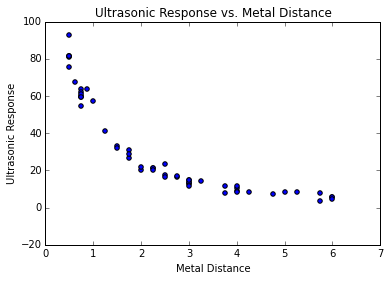

In [21]:
import pandas as pd
data = pd.read_csv('chwirut2.csv')
print(data.head())
import pylab as pl
pl.scatter(data.x, data.y)
pl.title("Ultrasonic Response vs. Metal Distance")
pl.xlabel("Metal Distance")
pl.ylabel("Ultrasonic Response")

#### STEP 2: Compute the weight matrix (W_x) when $x_0 = 3$ and $\tau^2 = 5$.

In [23]:
def get_W(x_vec, x_0, tau_sqr):
    ''' Computes W_x where x_vec is the feature numpy vector and x_0 (float) is the value being predicted
        tau_sqr is the band width
    '''
    w_vec = np.exp(-1.0*(x_0 - x_vec)**2/(2*tau_sqr))
    w_mat = np.diag(w_vec)
    return w_mat
data['ones'] = 1.0
Xnew = np.matrix(data[['ones','x']])
Ynew = np.matrix(data[['y']])
x_0 = 3.0
tau_sqr = 1
W_3 = get_W(data['x'], x_0, tau_sqr)
print(W_3)

[[ 0.04393693  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.13533528  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.45783336 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.96923323  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.04393693  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.45783336]]


#### STEP 3: Get the solution for $\vec{\theta}$ when $x = 3$ using $\vec{\theta} = \left(X^TW_xX\right)^{-1}X^TW_x\vec{y}$

In [24]:
theta = (Xnew.T *W_3*Xnew).I*Xnew.T*W_3*Ynew
print(theta)

[[ 51.29264145]
 [-11.61972333]]


#### STEP 4: Plot this solution.

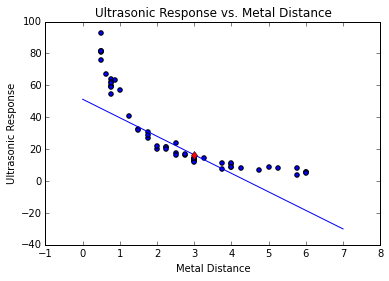

In [25]:
pl.scatter(data.x, data.y)
xplot = np.linspace(0,7,100)
yplot = theta[0,0] + theta[1,0]*xplot
y_0 = theta[0,0] + theta[1,0]*x_0
# Plot the line used for x_0 = 3.0
pl.plot(xplot, yplot)
# Plot the point on the line at x_0 = 3.0
pl.plot(x_0,y_0, "d",color='red') 
pl.title("Ultrasonic Response vs. Metal Distance")
pl.xlabel("Metal Distance")
pl.ylabel("Ultrasonic Response")

#### STEP 5: Plot the solution for 10 different values of $x_0$ 

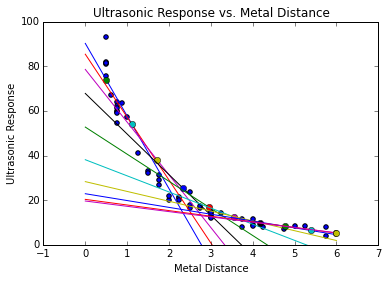

In [26]:
#Make a vector of values for x_0.  We will call these x_i
tau_sqr = 1
x_0_vec = np.linspace(0.5, 6, 10)
#Set up the initial plot and xplot array
pl.scatter(data.x, data.y)
pl.title("Ultrasonic Response vs. Metal Distance")
pl.xlabel("Metal Distance")
pl.ylabel("Ultrasonic Response")
xplot = np.linspace(0, 6, 100)
for x_i in x_0_vec:
    W_i = get_W(data['x'], x_i, tau_sqr)
    theta = (Xnew.T *W_i*Xnew).I*Xnew.T*W_i*Ynew
    yplot = theta[0,0] + theta[1,0]*xplot
    y_i = theta[0,0] + theta[1,0]*x_i
    # Plot the line used for x_0 = 3.0
    pl.plot(xplot, yplot)
    # Plot the point on the line at x_0 = 3.0
    pl.plot(x_i,y_i, "o")
pl.ylim(0,100)

#### STEP 6: Make a function that plots many solutions, but only the points, for a given `data` object and $\tau^2$

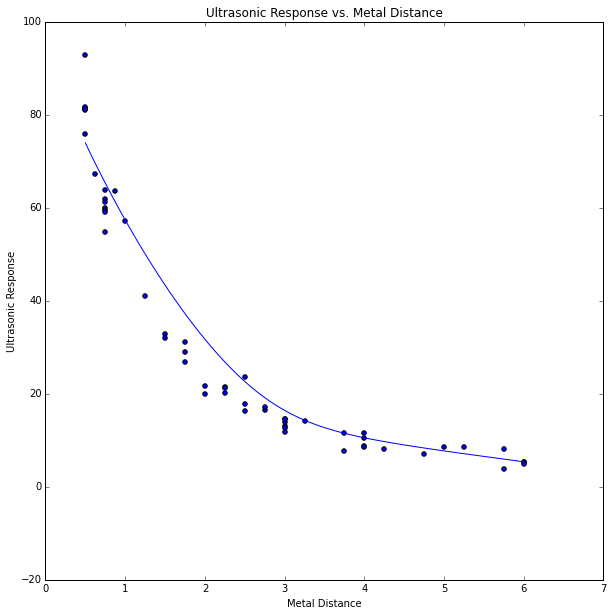

In [27]:
#Set up the initial plot and xplot array
pl.figure(figsize=(10,10))
pl.scatter(data.x, data.y)
pl.title("Ultrasonic Response vs. Metal Distance")
pl.xlabel("Metal Distance")
pl.ylabel("Ultrasonic Response")
def make_plot(data, tau_sqr):
    data['ones'] = 1.0
    Xnew = np.matrix(data[['ones','x']])
    Ynew = np.matrix(data[['y']])
    x_0_vec = np.linspace(0.5, 6, 100)
    y_0_vec = []
    #for each x_i, compute and plot the solution, both line and point
    for x_i in x_0_vec:
        W_i = get_W(data['x'], x_i, tau_sqr)
        theta = (Xnew.T *W_i*Xnew).I*Xnew.T*W_i*Ynew
        y_i = theta[0,0] + theta[1,0]*x_i
        y_0_vec.append(y_i)
    # Plot the point on the line at x_0 = 3.0
    l = "$\\tau^2 = " + str(tau_sqr) + "$"
    pl.plot(x_0_vec,y_0_vec, label = l)
make_plot(data, 1.0)

#### STEP 7: Show the effect of changing the bandwidth $\tau^2$

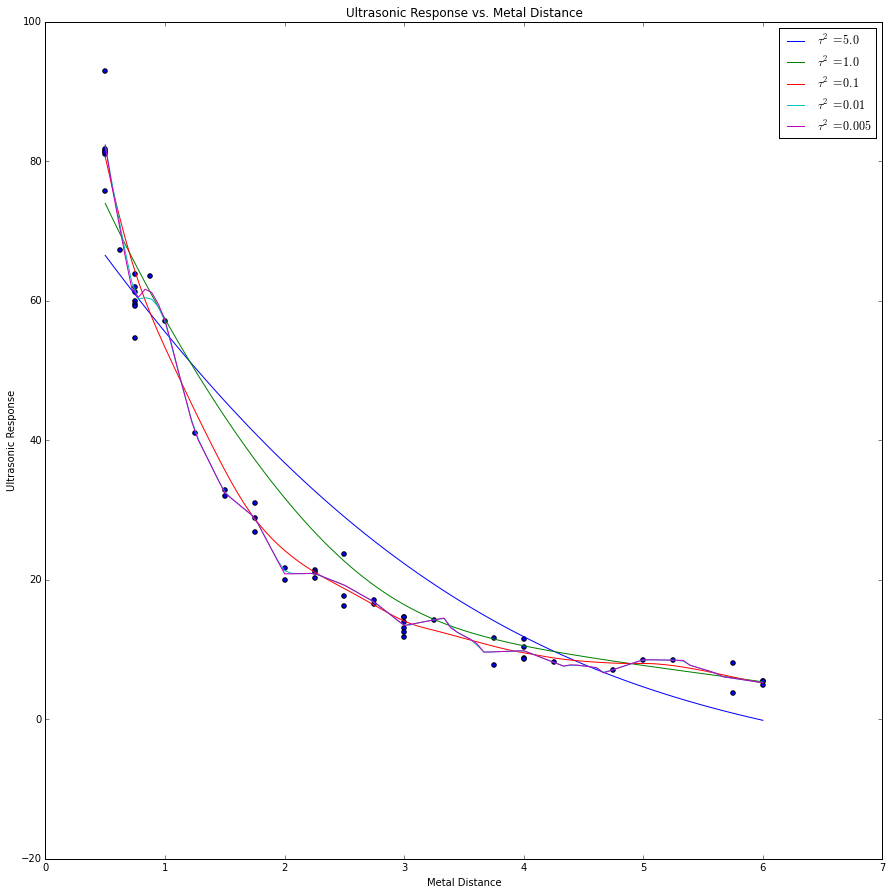

In [28]:
#Set up the initial plot and xplot array
pl.figure(figsize=(15,15))
pl.scatter(data.x, data.y)
pl.title("Ultrasonic Response vs. Metal Distance")
pl.xlabel("Metal Distance")
pl.ylabel("Ultrasonic Response")
def make_plot(data, tau_sqr):
    data['ones'] = 1.0
    Xnew = np.matrix(data[['ones','x']])
    Ynew = np.matrix(data[['y']])
    x_0_vec = np.linspace(0.5, 6, 100)
    y_0_vec = []
    #for each x_i, compute and plot the solution, both line and point
    for x_i in x_0_vec:
        W_i = get_W(data['x'], x_i, tau_sqr)
        theta = (Xnew.T *W_i*Xnew).I*Xnew.T*W_i*Ynew
        y_i = theta[0,0] + theta[1,0]*x_i
        y_0_vec.append(y_i)
    # Plot the point on the line at x_0 = 3.0
    l = "$\\tau^2 = " + str(tau_sqr) + "$"
    pl.plot(x_0_vec,y_0_vec, label = l)
make_plot(data, 5.0)
make_plot(data, 1.0)
make_plot(data, 0.1)
make_plot(data, 0.01)
make_plot(data, 0.005)
pl.legend()

#### STEP 8: Hand-select the "best" value of $\tau^2$

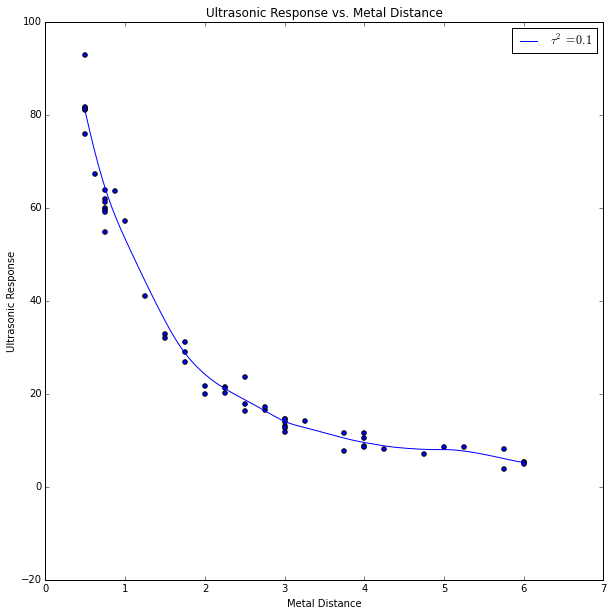

In [29]:
#Set up the initial plot and xplot array
pl.figure(figsize=(10,10))
pl.scatter(data.x, data.y)
pl.title("Ultrasonic Response vs. Metal Distance")
pl.xlabel("Metal Distance")
pl.ylabel("Ultrasonic Response")
def make_plot(data, tau_sqr):
    data['ones'] = 1.0
    Xnew = np.matrix(data[['ones','x']])
    Ynew = np.matrix(data[['y']])
    x_0_vec = np.linspace(0.5, 6, 100)
    y_0_vec = []
    #for each x_i, compute and plot the solution, both line and point
    for x_i in x_0_vec:
        W_i = get_W(data['x'], x_i, tau_sqr)
        theta = (Xnew.T *W_i*Xnew).I*Xnew.T*W_i*Ynew
        y_i = theta[0,0] + theta[1,0]*x_i
        y_0_vec.append(y_i)
    # Plot the point on the line at x_0 = 3.0
    l = "$\\tau^2 = " + str(tau_sqr) + "$"
    pl.plot(x_0_vec,y_0_vec, label = l)
make_plot(data, 0.1)
pl.legend()

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 3</H1>


Perform the following steps on the `Thurber` data set.

1. Make a plot that shows the locally linear regression model for various values of $\tau^2$
2. Through trial and error, find and plot your best guess for the optimal value of $\tau^2$